<a href="https://colab.research.google.com/github/silvi-no26/c_vision/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


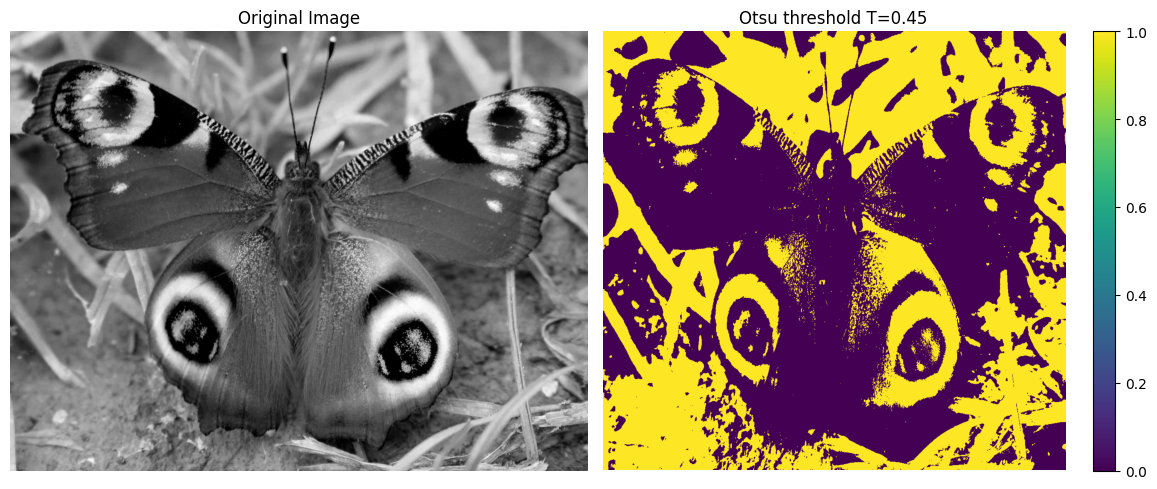

In [54]:
#TASK1:Load an image and apply a thresholding method. Analyze and discuss the segmentation results
import skimage as sk
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Load the image
image = sk.io.imread('/content/drive/MyDrive/images_cv/5184.webp', as_gray=True)

#Apply Otsu
thresh = threshold_otsu(image)
binary_image = image > thresh

# Plot both images
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')

# Original grayscale image
ax[0].imshow(image, cmap='gray', aspect='auto')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Binary image
imgplot = ax[1].imshow(binary_image, aspect='auto')
ax[1].set_title('Otsu threshold T={:.2f}'.format(thresh))
ax[1].axis('off')
fig.colorbar(imgplot, ax=ax[1])

plt.tight_layout()
plt.show()

# Analysis of results
# Otsu's thresholding finds the threshold that maximizes inter-class variance.
# In this case, it separates pixels into two groups: object and background.
# The effectiveness depends on the image contrast

Here N = 1215000 and d = 3
The shape of the array should be 1215000 x 3


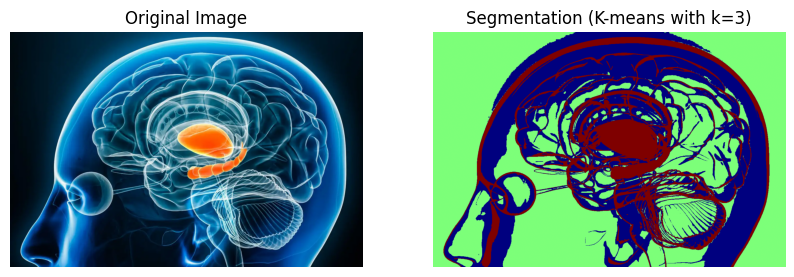

In [55]:
#TASK2: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.
import skimage as sk
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

#Load the image
I_k = sk.io.imread('/content/drive/MyDrive/images_cv/SEI_219928865.webp')

#we need to reshape the data as a Nxd array
v_image = np.reshape(I_k,(I_k.shape[0]*I_k.shape[1],I_k.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I_k.shape[0]*I_k.shape[1],I_k.shape[2]))
print('The shape of the array should be {} x {}'.format(I_k.shape[0]*I_k.shape[1],I_k.shape[2]))

v_image.shape

#then we can apply k-means
# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 3
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_image)

v_kmeans = kmeans.predict(v_image)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.reshape(v_kmeans,(I_k.shape[0],I_k.shape[1])) # reshape back to original image size

# Shape back result as image
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_k)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.jet)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()
# Evaluation of results
# K-Means groups pixels into clusters based on their color similarity.
# The quality of segmentation depends on the choice of the number of clusters.
# Metrics like silhouette score can be used to evaluate the quality.
#About the image
#The image was segmented using an unsupervised K-Means clustering method with 3 clusters. Each pixel
#was treated as a point in a 3D color space (RGB), and K-Means grouped similar color values. The resulting
#segmentation highlights regions of similar color, but does not consider spatial relationships, so the
#clusters appear a bit noisy.

In [58]:
#Here we can try GMM+BIC
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(v_image)
    bic.append(gmm.bic(v_image))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm_win = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(v_image)


[np.float64(36080541.512917206)]
[np.float64(36080541.512917206), np.float64(30867142.94241618)]
[np.float64(36080541.512917206), np.float64(30867142.94241618), np.float64(29738526.851367813)]
[np.float64(36080541.512917206), np.float64(30867142.94241618), np.float64(29738526.851367813), np.float64(29210465.424549177)]
[np.float64(36080541.512917206), np.float64(30867142.94241618), np.float64(29738526.851367813), np.float64(29210465.424549177), np.float64(29019977.715674046)]
[np.float64(36080541.512917206), np.float64(30867142.94241618), np.float64(29738526.851367813), np.float64(29210465.424549177), np.float64(29019977.715674046), np.float64(28859885.28002636)]
[np.float64(36080541.512917206), np.float64(30867142.94241618), np.float64(29738526.851367813), np.float64(29210465.424549177), np.float64(29019977.715674046), np.float64(28859885.28002636), np.float64(28719674.16684136)]
[np.float64(36080541.512917206), np.float64(30867142.94241618), np.float64(29738526.851367813), np.float64

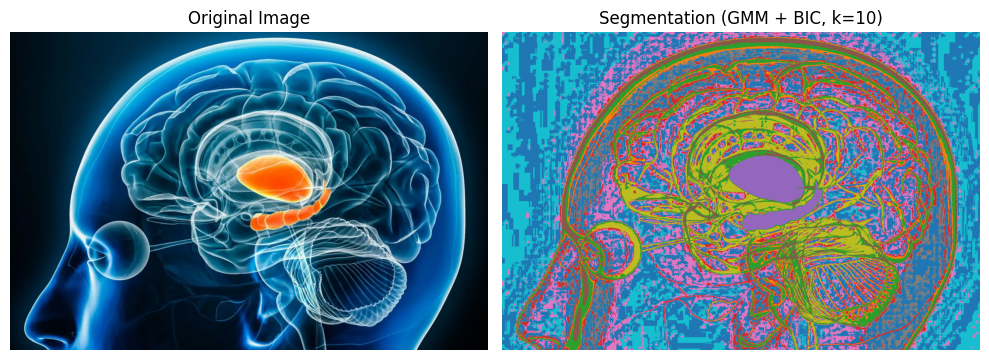

In [62]:

v_gmm = gmm_win.predict(v_image)
I_gmm_bic = v_gmm.reshape(I_k.shape[0], I_k.shape[1])


fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I_k)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_gmm_bic, cmap=plt.cm.tab10)
ax2.set_title('Segmentation (GMM + BIC, k={})'.format(idx_winner + 1))
ax2.set_axis_off()

plt.tight_layout()
plt.show()

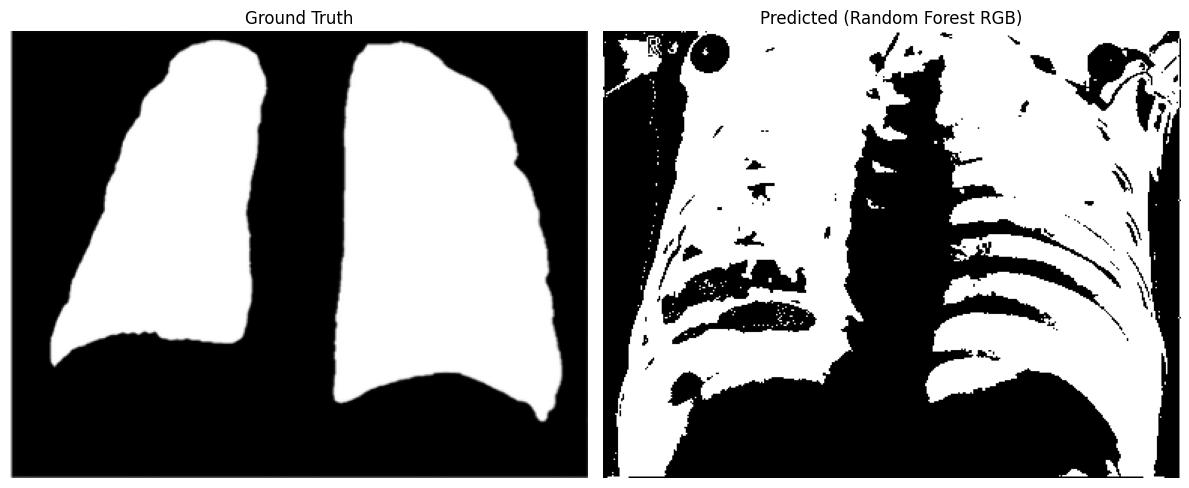

In [46]:
#TASK3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load RGB image
image = sk.io.imread('/content/drive/MyDrive/images_cv/original_image.PNG')
image_rgb = image[:, :, :3] #after checking the shqape of my image I saw that image gas 4 channels and I take off the alpha channel
labels = sk.io.imread('/content/drive/MyDrive/images_cv/ground_truth.PNG', as_gray=True)

# Reshape
image_2D = image_rgb.reshape(-1, 3)
labels_1D = labels.reshape(-1)
labels_1D = (labels_1D > 0.5).astype(int)  # binarize

# Train on all data
classifier = RandomForestClassifier(random_state=0).fit(image_2D, labels_1D)

# Predict on full image
predicted_labels = classifier.predict(image_2D)
predicted_image = predicted_labels.reshape(image.shape[0], image.shape[1])

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(labels, cmap='gray')
ax[0].set_title('Ground Truth')
ax[0].axis('off')

ax[1].imshow(predicted_image, cmap='gray')
ax[1].set_title('Predicted (Random Forest RGB)')
ax[1].axis('off')

plt.tight_layout()
plt.show()
# Discussion of effectiveness and limitations
# Supervised segmentation uses labels to train a model.
# It can be very accurate if sufficient labeled data is available.
# However, labeling data can be expensive and time-consuming.

Predicted labels distribution: (array([0]), array([114048]))
Training accuracy: 0.5874544051627385


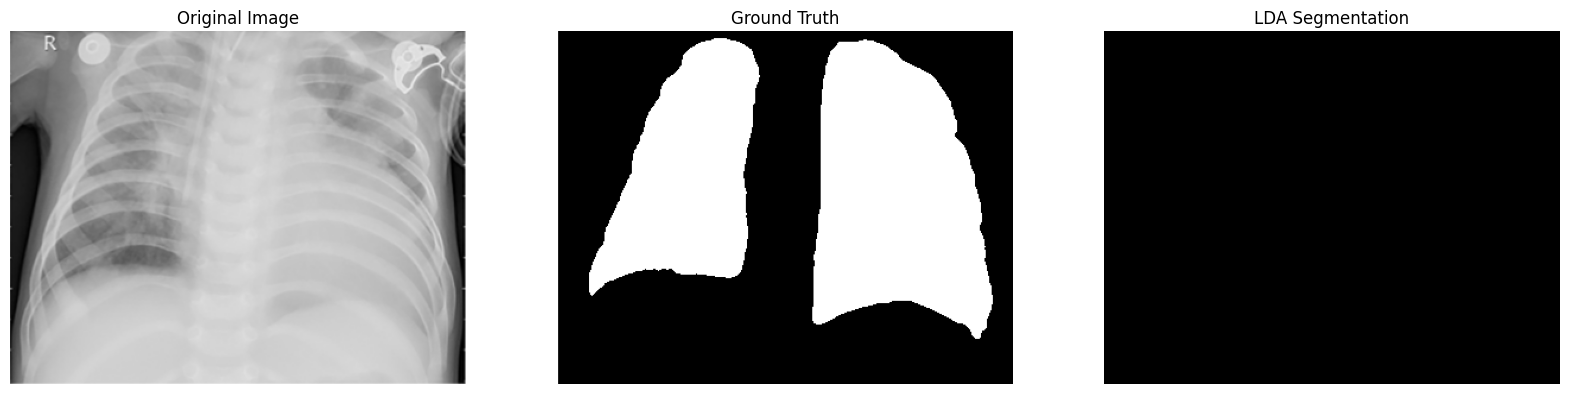

In [53]:
#LDA
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Load RGB image (remove alpha)
I_train = skio.imread('/content/drive/MyDrive/images_cv/original_image.PNG')[:, :, :3]

# Load GT grayscale and binarize
I_train_GT = skio.imread('/content/drive/MyDrive/images_cv/ground_truth.PNG', as_gray=True)
labels = (I_train_GT > 0.5).astype(int)

# Flatten
v_I_train = I_train.reshape(-1, 3)
v_train_GT = labels.reshape(-1)

# Scale RGB features
scaler = StandardScaler()
v_I_train_scaled = scaler.fit_transform(v_I_train)

# Train LDA
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train_scaled, v_train_GT)

# Predict
v_lda = lda_model.predict(v_I_train_scaled)

print("Predicted labels distribution:", np.unique(v_lda, return_counts=True))

# Accuracy
from sklearn.metrics import accuracy_score
print("Training accuracy:", accuracy_score(v_train_GT, v_lda))

# Reshape for display
I_lda = v_lda.reshape(I_train.shape[0], I_train.shape[1])

# Plot
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

ax[0].imshow(I_train)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(labels, cmap='gray')
ax[1].set_title('Ground Truth')
ax[1].axis('off')

ax[2].imshow(I_lda, cmap='gray')
ax[2].set_title('LDA Segmentation')
ax[2].axis('off')

plt.show()
#LDA assumes Gaussian distributions per class in the feature space.
#If RGB pixel values for the two classes overlap too much or aren’t well separated, LDA struggles.
#The features (RGB colors) might not be enough to separate the classes.
#For example, if the foreground and background have similar colors, LDA can't distinguish well(as in our image).

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Predicted label distribution: (array([0, 1]), array([112994,   1054]))
Training accuracy: 0.6199231902356902


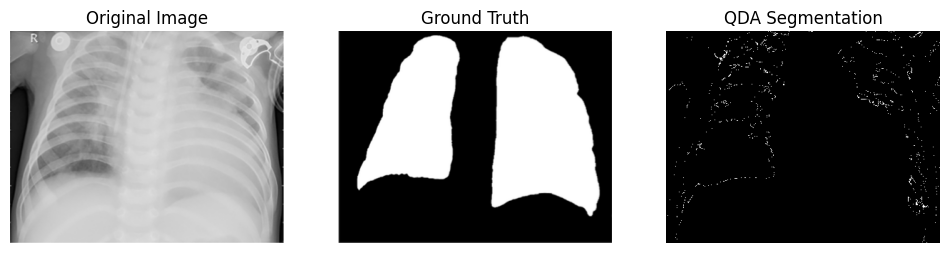

In [52]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Reshape your training image and labels
v_I_train = I_train[:, :, :3].reshape(-1, 3)
v_train_GT = I_train_GT.reshape(-1).astype(int)

#Scale features
scaler = StandardScaler()
v_I_train_scaled = scaler.fit_transform(v_I_train)

# Train QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(v_I_train_scaled, v_train_GT)

# Predict on training data
v_pred = qda.predict(v_I_train_scaled)

print("Predicted label distribution:", np.unique(v_pred, return_counts=True))
print("Training accuracy:", accuracy_score(v_train_GT, v_pred))

# Reshape prediction back to image shape
I_qda = v_pred.reshape(I_train.shape[0], I_train.shape[1])

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(I_train[:, :, :3])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(I_train_GT, cmap='gray')
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(I_qda, cmap='gray')
plt.title('QDA Segmentation')
plt.axis('off')

plt.show()
